In [1]:
import pandas as pd
import numpy as np

In [2]:
from pandas_datareader import data

# Works so fine... 

In [3]:
data.DataReader('IDEA.NS', start= 2021, data_source= 'yahoo')

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-01,11.35,10.60,10.75,11.20,423793813,11.20
2021-01-04,12.15,11.45,11.80,11.90,649973524,11.90
2021-01-05,12.15,11.60,11.80,11.90,335592305,11.90
2021-01-06,12.25,11.50,12.00,11.85,374712576,11.85
2021-01-07,12.35,11.85,11.95,11.95,352143303,11.95
2021-01-08,12.30,11.65,12.10,11.75,290761549,11.75
2021-01-11,12.05,11.35,11.95,11.50,221429001,11.50
2021-01-12,12.25,11.30,11.45,12.10,389146921,12.10
2021-01-13,12.75,11.90,12.25,12.25,672714234,12.25


### Now, Let's plot it!

In [4]:
IDEA2021 = data.DataReader('IDEA.NS', start= 2021, data_source= 'yahoo')

In [5]:
IDEA2021.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-01,11.35,10.60,10.75,11.20,423793813,11.20
2021-01-04,12.15,11.45,11.80,11.90,649973524,11.90
2021-01-05,12.15,11.60,11.80,11.90,335592305,11.90
2021-01-06,12.25,11.50,12.00,11.85,374712576,11.85
2021-01-07,12.35,11.85,11.95,11.95,352143303,11.95


<AxesSubplot:xlabel='Date'>

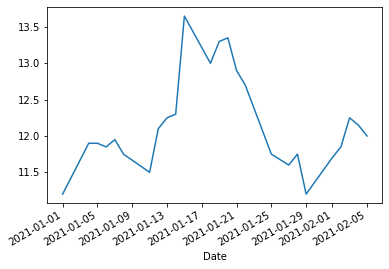

In [6]:
IDEA2021.Close.plot()

### And also check that, the Indices are the DateRange!

In [6]:
IDEA2021.index

DatetimeIndex(['2021-01-01', '2021-01-04', '2021-01-05', '2021-01-06',
               '2021-01-07', '2021-01-08', '2021-01-11', '2021-01-12',
               '2021-01-13', '2021-01-14', '2021-01-15', '2021-01-18',
               '2021-01-19', '2021-01-20', '2021-01-21', '2021-01-22',
               '2021-01-25', '2021-01-27', '2021-01-28', '2021-01-29',
               '2021-02-01', '2021-02-02', '2021-02-03', '2021-02-04',
               '2021-02-05'],
              dtype='datetime64[ns]', name='Date', freq=None)

<AxesSubplot:xlabel='Date'>

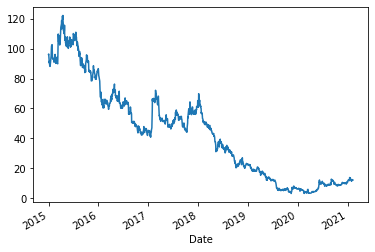

In [3]:
# More data, for an Example
IDEA_from_2015 = data.DataReader('IDEA.NS', start= 2015, data_source= 'yahoo')['Close']
IDEA_from_2015.plot()

###  

# Resempling for Good 

In [8]:
IDEA2021['Close'].resample('BA').mean()

Date
2021-12-31    12.154
Freq: BA-DEC, Name: Close, dtype: float64

In [9]:
IDEA_from_2015.resample('A').mean()


Date
2015-12-31    96.793562
2016-12-31    58.946104
2017-12-31    54.045353
2018-12-31    36.419206
2019-12-31    11.736941
2020-12-31     7.514000
2021-12-31    12.154000
Freq: A-DEC, Name: Close, dtype: float64

In [10]:
IDEA_from_2015.resample('BA').mean()


Date
2015-12-31    96.793562
2016-12-30    58.946104
2017-12-29    54.045353
2018-12-31    36.419206
2019-12-31    11.736941
2020-12-31     7.514000
2021-12-31    12.154000
Freq: BA-DEC, Name: Close, dtype: float64

<AxesSubplot:xlabel='Date'>

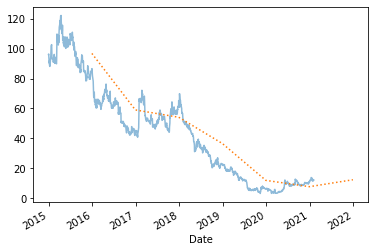

In [11]:
IDEA_from_2015.plot(alpha= 0.5)
IDEA_from_2015.resample('BA').mean().plot(style= ':')

In [12]:
IDEA_from_2015.asfreq('BA')

Date
2015-12-31    86.616501
2016-12-30    44.710152
2017-12-29    65.211098
2018-12-31    22.762079
2019-12-31     6.150000
2020-12-31    10.650000
Freq: BA-DEC, Name: Close, dtype: float64

In [13]:
import matplotlib.pyplot as plt

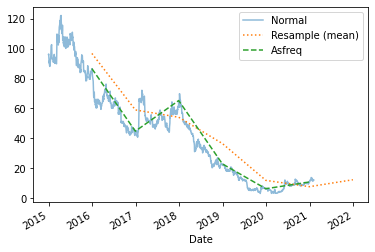

In [14]:
IDEA_from_2015.plot(alpha= 0.5)
IDEA_from_2015.resample('BA').mean().plot(style= ':')
IDEA_from_2015.asfreq('BA').plot(style= '--')
plt.legend(['Normal','Resample (mean)', 'Asfreq'])

## Now trying some other kind of date freqs to showcase the `NA` values and how to handle them. 

In [15]:
IDEA_from_2015.asfreq('BM')

Date
2015-01-30     93.369751
2015-02-27     93.309456
2015-03-31    110.946297
2015-04-30    105.519577
2015-05-29    104.434235
                 ...    
2020-09-30      9.550000
2020-10-30      8.750000
2020-11-30           NaN
2020-12-31     10.650000
2021-01-29     11.200000
Freq: BM, Name: Close, Length: 73, dtype: float64

    Here, I want the values of stocks at end of Each Month, so, I will write
    'BA'. But as it will only show the Business days i.e. non Saturday-Sunday, it will not be able to recognize that even on non weedends, there can be missing values because of some holidays.
    
    ( That can also be a case on 'BA' where the last day of the month is holiday and non weekend )
    
But for now... let's talk about the current sitution where the freq is 'BM'

In [16]:
IDEA_from_2015.asfreq('BM')

Date
2015-01-30     93.369751
2015-02-27     93.309456
2015-03-31    110.946297
2015-04-30    105.519577
2015-05-29    104.434235
                 ...    
2020-09-30      9.550000
2020-10-30      8.750000
2020-11-30           NaN
2020-12-31     10.650000
2021-01-29     11.200000
Freq: BM, Name: Close, Length: 73, dtype: float64

<AxesSubplot:xlabel='Date'>

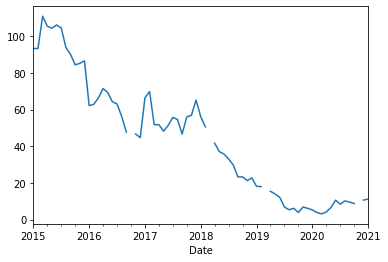

In [17]:
IDEA_from_2015.asfreq('BM').plot()

In [18]:
IDEA_from_2015.asfreq('BM', method= 'ffill')

Date
2015-01-30     93.369751
2015-02-27     93.309456
2015-03-31    110.946297
2015-04-30    105.519577
2015-05-29    104.434235
                 ...    
2020-09-30      9.550000
2020-10-30      8.750000
2020-11-30      9.800000
2020-12-31     10.650000
2021-01-29     11.200000
Freq: BM, Name: Close, Length: 73, dtype: float64

<AxesSubplot:xlabel='Date'>

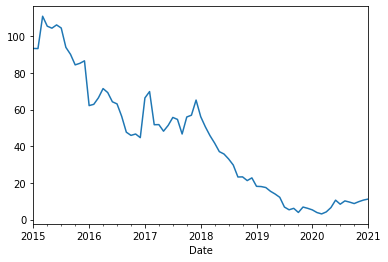

In [19]:
IDEA_from_2015.asfreq('BM', method= 'ffill').plot()

### Don't get fooled.
For the example of 20-11-2020 <- there was NaN, and you see it has not filled with the 30-10 / 31-12 but it has not. So it **will fill the data from its ADJESENT date man!** i.e. 29-11 / 1-12 ! Simple!

#### In the book, they have taken the freq as 'D', now let's try that...

In [20]:
IDEA_from_2015.asfreq('D')

Date
2015-01-01    96.083115
2015-01-02    96.414749
2015-01-03          NaN
2015-01-04          NaN
2015-01-05    92.585892
                ...    
2021-02-01    11.700000
2021-02-02    11.850000
2021-02-03    12.250000
2021-02-04    12.150000
2021-02-05    12.000000
Freq: D, Name: Close, Length: 2228, dtype: float64

In [27]:
IDEA_from_2015.asfreq('D')[ IDEA_from_2015.asfreq('D').isnull() == True ]

Date
2015-01-03   NaN
2015-01-04   NaN
2015-01-10   NaN
2015-01-11   NaN
2015-01-17   NaN
              ..
2021-01-23   NaN
2021-01-24   NaN
2021-01-26   NaN
2021-01-30   NaN
2021-01-31   NaN
Name: Close, Length: 725, dtype: float64

    That means there are 725 days are Holidays from 2228 days data.
    Now, we can even reduce that...
    
We can use **B** instead of **D**

In [28]:
IDEA_from_2015.asfreq('B')

Date
2015-01-01    96.083115
2015-01-02    96.414749
2015-01-05    92.585892
2015-01-06    90.746834
2015-01-07    90.294609
                ...    
2021-02-01    11.700000
2021-02-02    11.850000
2021-02-03    12.250000
2021-02-04    12.150000
2021-02-05    12.000000
Freq: B, Name: Close, Length: 1592, dtype: float64

In [29]:
IDEA_from_2015.asfreq('B')[ IDEA_from_2015.asfreq('B').isnull() == True ]

Date
2015-01-26   NaN
2015-02-17   NaN
2015-03-06   NaN
2015-04-02   NaN
2015-04-03   NaN
              ..
2020-10-02   NaN
2020-11-16   NaN
2020-11-30   NaN
2020-12-25   NaN
2021-01-26   NaN
Name: Close, Length: 89, dtype: float64

    See? Only 89 days are found NaN from 1592 ... that means the ratio is...
    
    725 / 2228 * 100 = 32%
    89 / 1592 * 100 = 5%
    
    Cool!

# `shift()` and `tshift()`

`shift()` : It will shift the DATA
`tshift()` : It will shift the TIME (index) 

***What and Why***:

    Here, first SHIFT:
        It will shift the DATA from UP to BOTTOM like...
        Original:
            1-1-2020 123
            2-1-2020 324
            3-1-2020 223
            4-1-2020 443
        Shifted by 2:
            1-1-2020 NaN
            2-1-2020 NaN
            3-1-2020 123
            4-1-2020 324
            
        That also means that the data will be lost in the first 2 and last 2 rows.
        • The good thing about this is that, it can Also be used without DATE as the INDEX!
        
    Now, TSHIFT:
        • It REQUIRES the DATE as it's INDEX.
        
        Original:
            1-1-2020 123
            2-1-2020 324
            3-1-2020 223
            4-1-2020 443
        Shifted by 2:
            3-1-2020 123
            4-1-2020 324
            5-1-2020 223
            6-1-2020 443
            
            
        Here, you will not lose any data, but the indices will be changed!
## SEE!        
`tshift()` function has been removed from the new pandas library, but to use that just use `shfit()` and provide the `freq='D'` argument. To make it act like `tshift()`!
        
        
            

#### `shift()`

In [51]:
IDEA_from_2015

Date
2015-01-01    96.083115
2015-01-02    96.414749
2015-01-05    92.585892
2015-01-06    90.746834
2015-01-07    90.294609
                ...    
2021-02-01    11.700000
2021-02-02    11.850000
2021-02-03    12.250000
2021-02-04    12.150000
2021-02-05    12.000000
Name: Close, Length: 1503, dtype: float64

In [37]:
IDEA_from_2015.shift(2)

Date
2015-01-01          NaN
2015-01-02          NaN
2015-01-05    96.083115
2015-01-06    96.414749
2015-01-07    92.585892
                ...    
2021-02-01    11.750000
2021-02-02    11.200000
2021-02-03    11.700000
2021-02-04    11.850000
2021-02-05    12.250000
Name: Close, Length: 1503, dtype: float64

#### `tshift()` = `shift(freq='D')`

In [49]:
IDEA_from_2015

Date
2015-01-01    96.083115
2015-01-02    96.414749
2015-01-05    92.585892
2015-01-06    90.746834
2015-01-07    90.294609
                ...    
2021-02-01    11.700000
2021-02-02    11.850000
2021-02-03    12.250000
2021-02-04    12.150000
2021-02-05    12.000000
Name: Close, Length: 1503, dtype: float64

In [52]:
IDEA_from_2015.shift(2, freq= 'D')

Date
2015-01-03    96.083115
2015-01-04    96.414749
2015-01-07    92.585892
2015-01-08    90.746834
2015-01-09    90.294609
                ...    
2021-02-03    11.700000
2021-02-04    11.850000
2021-02-05    12.250000
2021-02-06    12.150000
2021-02-07    12.000000
Name: Close, Length: 1503, dtype: float64

In [54]:
pd.to_datetime('1-1-2021') + pd.Timedelta(20, 'D')

Timestamp('2021-01-21 00:00:00')

###  

In [56]:
IDEA_from_2015.rolling(365, center= True)

Rolling [window=365,center=True,axis=0]

### Trying in the fake data

In [5]:
indices = pd.date_range('2019','2020-12-31')
indices

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', length=731, freq='D')

In [6]:
tmp = pd.Series(np.random.randint(1,731,731), index= indices)
tmp

2019-01-01    684
2019-01-02    313
2019-01-03    663
2019-01-04    274
2019-01-05    611
             ... 
2020-12-27    557
2020-12-28    294
2020-12-29    636
2020-12-30    411
2020-12-31    203
Freq: D, Length: 731, dtype: int32

In [7]:
roller = tmp.rolling(5, center= False)

In [8]:
newdata = pd.DataFrame({'Input': tmp,
                        'rolling Mean': roller.mean(),
                        'rolling Sum': roller.sum()})

In [9]:
tmp.head()

2019-01-01    684
2019-01-02    313
2019-01-03    663
2019-01-04    274
2019-01-05    611
Freq: D, dtype: int32

In [10]:
newdata.head(10)

,Input,rolling Mean,rolling Sum
2019-01-01,684,NaN,NaN
2019-01-02,313,NaN,NaN
2019-01-03,663,NaN,NaN
2019-01-04,274,NaN,NaN
2019-01-05,611,509.0,2545.0
2019-01-06,676,507.4,2537.0
2019-01-07,130,470.8,2354.0
2019-01-08,502,438.6,2193.0
2019-01-09,571,498.0,2490.0
2019-01-10,267,429.2,2146.0


### Works amazingly with Roller...

But what if I want to achieve the same thinig with groupby?


    Here I am simply going throught the solutions, for Explanation, please refer the Book itself where I have
    noted the explanation on Pg. 202

In [11]:
tmp

2019-01-01    684
2019-01-02    313
2019-01-03    663
2019-01-04    274
2019-01-05    611
             ... 
2020-12-27    557
2020-12-28    294
2020-12-29    636
2020-12-30    411
2020-12-31    203
Freq: D, Length: 731, dtype: int32

#### With Rolling

In [12]:
roller = tmp.rolling(2)

In [13]:
roller.sum()

2019-01-01       NaN
2019-01-02     997.0
2019-01-03     976.0
2019-01-04     937.0
2019-01-05     885.0
               ...  
2020-12-27     616.0
2020-12-28     851.0
2020-12-29     930.0
2020-12-30    1047.0
2020-12-31     614.0
Freq: D, Length: 731, dtype: float64

#### With Groupby (self made) 
This is not my solution, please refer this [link](https://stackoverflow.com/questions/46478518/groupby-dataframe-by-n-columns-or-n-rows/46478576#46478576)

In [14]:
groupper = np.arange( tmp.shape[0] )

In [15]:
groupper

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [16]:
groupper // 2

array([  0,   0,   1,   1,   2,   2,   3,   3,   4,   4,   5,   5,   6,
         6,   7,   7,   8,   8,   9,   9,  10,  10,  11,  11,  12,  12,
        13,  13,  14,  14,  15,  15,  16,  16,  17,  17,  18,  18,  19,
        19,  20,  20,  21,  21,  22,  22,  23,  23,  24,  24,  25,  25,
        26,  26,  27,  27,  28,  28,  29,  29,  30,  30,  31,  31,  32,
        32,  33,  33,  34,  34,  35,  35,  36,  36,  37,  37,  38,  38,
        39,  39,  40,  40,  41,  41,  42,  42,  43,  43,  44,  44,  45,
        45,  46,  46,  47,  47,  48,  48,  49,  49,  50,  50,  51,  51,
        52,  52,  53,  53,  54,  54,  55,  55,  56,  56,  57,  57,  58,
        58,  59,  59,  60,  60,  61,  61,  62,  62,  63,  63,  64,  64,
        65,  65,  66,  66,  67,  67,  68,  68,  69,  69,  70,  70,  71,
        71,  72,  72,  73,  73,  74,  74,  75,  75,  76,  76,  77,  77,
        78,  78,  79,  79,  80,  80,  81,  81,  82,  82,  83,  83,  84,
        84,  85,  85,  86,  86,  87,  87,  88,  88,  89,  89,  9

### See the change? 
The values are repeted for the times we have written in it.
So the grouping is so easy now!

In [17]:
groupper //= 2

In [18]:
tmp.groupby(groupper).sum()

0       997
1       937
2      1287
3       632
4       838
       ... 
361     202
362     210
363     851
364    1047
365     203
Length: 366, dtype: int32

Seen that? 

### But the results are not the same!
Why?

If you see in the Roller example, you will notice that, the total rows are still 731 and here onlt 366...
<br>
That means the window is `NOT OVERLAPPING` as it does in the Rolling...
<br>
The solution?

In [20]:
tmp

2019-01-01    684
2019-01-02    313
2019-01-03    663
2019-01-04    274
2019-01-05    611
             ... 
2020-12-27    557
2020-12-28    294
2020-12-29    636
2020-12-30    411
2020-12-31    203
Freq: D, Length: 731, dtype: int32

In [37]:
tmp = tmp.reset_index()

In [50]:
tmp

,index,0
0,2019-01-01,684
1,2019-01-02,313
2,2019-01-03,663
3,2019-01-04,274
4,2019-01-05,611
...,...,...
726,2020-12-27,557
727,2020-12-28,294
728,2020-12-29,636
729,2020-12-30,411


In [52]:
tmp['rolling_sum'] = tmp.groupby('index')[0].transform(lambda x: x.expanding().sum())

In [53]:
tmp

,index,0,rolling_sum
0,2019-01-01,684,684
1,2019-01-02,313,313
2,2019-01-03,663,663
3,2019-01-04,274,274
4,2019-01-05,611,611
...,...,...,...
726,2020-12-27,557,557
727,2020-12-28,294,294
728,2020-12-29,636,636
729,2020-12-30,411,411


In [94]:
data = dict(keys= list('ABCBCBCACABCA'), values= [11,332,44,22,333,22,11,55,44,55,66,66,55])

In [95]:
df = pd.DataFrame(data)

In [96]:
df

,keys,values
0,A,11
1,B,332
2,C,44
3,B,22
4,C,333
5,B,22
6,C,11
7,A,55
8,C,44
9,A,55


In [63]:
df.sort_values('keys')

,keys,values
0,A,11
7,A,55
9,A,55
12,A,55
1,B,332
3,B,22
5,B,22
10,B,66
2,C,44
4,C,333


In [68]:
df.groupby('keys').rolling(2).sum()

values
keys           
A    0      NaN
     7     66.0
     9    110.0
     12   110.0
B    1      NaN
     3    354.0
     5     44.0
     10    88.0
C    2      NaN
     4    377.0
     6    344.0
     8     55.0
     11   110.0

The operation above still does not prove the rolling with group by, it was just to demonstrate the power of rolling even with the group by!

Here, ↓ is another way t operfro mrolling with group by from the website, saved in the pocket

In [69]:
data = {'Platoon': ['A','A','A','A','A','A','B','B','B','B','B','C','C','C','C','C'],
       'Casualties': [1,4,5,7,5,5,6,1,4,5,6,7,4,6,4,6]}
df = pd.DataFrame(data)
df

,Platoon,Casualties
0,A,1
1,A,4
2,A,5
3,A,7
4,A,5
5,A,5
6,B,6
7,B,1
8,B,4
9,B,5


In [72]:
df.groupby('Platoon')['Casualties'].apply(lambda x:x.rolling(center=False,window=2).mean())


0     NaN
1     2.5
2     4.5
3     6.0
4     6.0
5     5.0
6     NaN
7     3.5
8     2.5
9     4.5
10    5.5
11    NaN
12    5.5
13    5.0
14    5.0
15    5.0
Name: Casualties, dtype: float64

In [80]:
df.groupby('Platoon')['Casualties'].rolling(center=False,window=2).mean()

Platoon    
A        0     NaN
         1     2.5
         2     4.5
         3     6.0
         4     6.0
         5     5.0
B        6     NaN
         7     3.5
         8     2.5
         9     4.5
         10    5.5
C        11    NaN
         12    5.5
         13    5.0
         14    5.0
         15    5.0
Name: Casualties, dtype: float64

In [83]:
df

,Platoon,Casualties
0,A,1
1,A,4
2,A,5
3,A,7
4,A,5
5,A,5
6,B,6
7,B,1
8,B,4
9,B,5


### Just trying `cumulative sum` - `cumsum()`

In [82]:
df.cumsum()

,Platoon,Casualties
0,A,1
1,AA,5
2,AAA,10
3,AAAA,17
4,AAAAA,22
5,AAAAAA,27
6,AAAAAAB,33
7,AAAAAABB,34
8,AAAAAABBB,38
9,AAAAAABBBB,43


# Any solution?

In [97]:
df

,keys,values
0,A,11
1,B,332
2,C,44
3,B,22
4,C,333
5,B,22
6,C,11
7,A,55
8,C,44
9,A,55


In [101]:
df.groupby('keys').rolling(2).aggregate(['sum','mean'])

values       
           sum   mean
keys                 
A    0     NaN    NaN
     7    66.0   33.0
     9   110.0   55.0
     12  110.0   55.0
B    1     NaN    NaN
     3   354.0  177.0
     5    44.0   22.0
     10   88.0   44.0
C    2     NaN    NaN
     4   377.0  188.5
     6   344.0  172.0
     8    55.0   27.5
     11  110.0   55.0